In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
!pip install catboost

from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib

# Connect to Google drive
from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.3 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
# Load the data
fatigue_df = pd.read_csv('/content/drive/MyDrive/Datasets/Carbon_Torsion_UC.csv')
fatigue_df

,Heat,Stress (Mpa),Number of Cycles,Temperature (°C),Reduction Ratio,dA,dB,dC,Frequency,Elongation,Reduction of Area,C,Si,Mn,P,S,Ni,Cr,Cu
0,1,320,28100,550,825,0.05,0.03,0.0,33,23,68,0.35,0.21,0.77,0.021,0.022,0.01,0.01,0.02
1,1,320,32100,550,825,0.05,0.03,0.0,33,23,68,0.35,0.21,0.77,0.021,0.022,0.01,0.01,0.02
2,1,310,90400,550,825,0.05,0.03,0.0,33,23,68,0.35,0.21,0.77,0.021,0.022,0.01,0.01,0.02
3,1,310,119000,550,825,0.05,0.03,0.0,33,23,68,0.35,0.21,0.77,0.021,0.022,0.01,0.01,0.02
4,1,300,263000,550,825,0.05,0.03,0.0,33,23,68,0.35,0.21,0.77,0.021,0.022,0.01,0.01,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,36,320,88300,650,660,0.06,0.00,0.0,33,23,62,0.56,0.26,0.67,0.019,0.026,0.04,0.13,0.11
374,36,310,117000,650,660,0.06,0.00,0.0,33,23,62,0.56,0.26,0.67,0.019,0.026,0.04,0.13,0.11
375,36,300,144000,650,660,0.06,0.00,0.0,33,23,62,0.56,0.26,0.67,0.019,0.026,0.04,0.13,0.11
376,36,300,321000,650,660,0.06,0.00,0.0,33,23,62,0.56,0.26,0.67,0.019,0.026,0.04,0.13,0.11


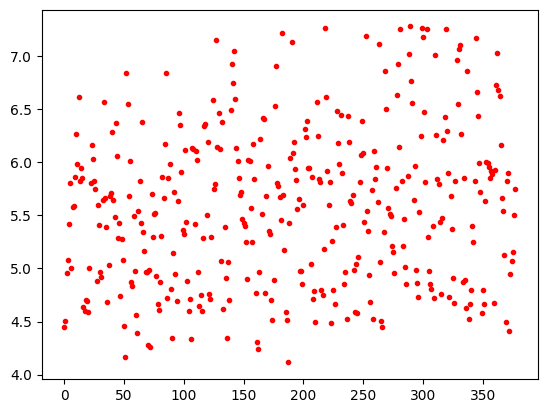

In [ ]:
# Scatter Plot for the Target Column
plt.plot(np.log10(fatigue_df['Number of Cycles']), 'r.')

# # Sort the data by ascending order of number of cycles
fatigue_df.sort_values(by=['Number of Cycles'], ascending=True, ignore_index=True, inplace=True)

In [ ]:
fatigue_df.columns

Index(['Heat', 'Stress (Mpa)', 'Number of Cycles', 'Temperature (°C)',
       'Reduction Ratio', 'dA', 'dB', 'dC', 'Frequency', 'Elongation',
       'Reduction of Area', 'C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Cu'],
      dtype='object')

In [ ]:
# Remove columns that are not needed
drop_cols = ['Heat','Number of Cycles'] # list the columns to drop along with target for independent feautures

# Use all remaining columns as features
features = fatigue_df.drop(drop_cols, axis=1)

# Use log transform of the number of cycles as targets
targets = np.log10(fatigue_df['Number of Cycles'])

# Display the features
features

,Stress (Mpa),Temperature (°C),Reduction Ratio,dA,dB,dC,Frequency,Elongation,Reduction of Area,C,Si,Mn,P,S,Ni,Cr,Cu
0,360,550,825,0.10,0.03,0.01,33,22,63,0.44,0.24,0.82,0.021,0.021,0.03,0.02,0.02
1,320,550,610,0.07,0.00,0.03,33,21,62,0.26,0.23,0.51,0.018,0.024,0.01,0.02,0.01
2,350,550,1270,0.12,0.01,0.00,33,22,66,0.45,0.26,0.76,0.027,0.019,0.01,0.11,0.02
3,290,600,1270,0.07,0.02,0.00,33,27,72,0.25,0.18,0.44,0.009,0.017,0.08,0.12,0.08
4,280,600,1270,0.07,0.02,0.00,33,27,72,0.25,0.18,0.44,0.009,0.017,0.08,0.12,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,360,550,660,0.06,0.00,0.00,33,55,79,0.56,0.26,0.67,0.019,0.026,0.04,0.13,0.11
374,310,600,1270,0.08,0.01,0.00,33,22,60,0.54,0.26,0.76,0.022,0.021,0.02,0.12,0.01
375,290,600,825,0.10,0.03,0.01,33,25,66,0.44,0.24,0.82,0.021,0.021,0.03,0.02,0.02
376,350,550,660,0.06,0.00,0.00,33,55,79,0.56,0.26,0.67,0.019,0.026,0.04,0.13,0.11


In [ ]:
# Convert the features into floats
features = features.astype('float64')

In [ ]:
# Calculate the coverage percentage of values within a specified range
def coverage(y, yL, yH):
        return np.sum(100 / y.shape[0] * ((y>yL)&(y<yH)))

q: 0.025 | pearsonr: 0.19796815262162015
q: 0.5 | pearsonr: 0.7588591791471618
q: 0.975 | pearsonr: 0.461086423745182
Pearson CC: 0.7588591791471618
R2 score: 0.566441930167827
RMSE: 0.5062166246661076
MAE: 0.3936229354194084
Coverage: 84.21052631578948
Upper coverage: 90.78947368421052
Lower coverage: 93.42105263157896
Average Interval Width: 2.145313053738416
Median Interval Width: 2.142964163136971
Composite Metric: 0.7482397876663934


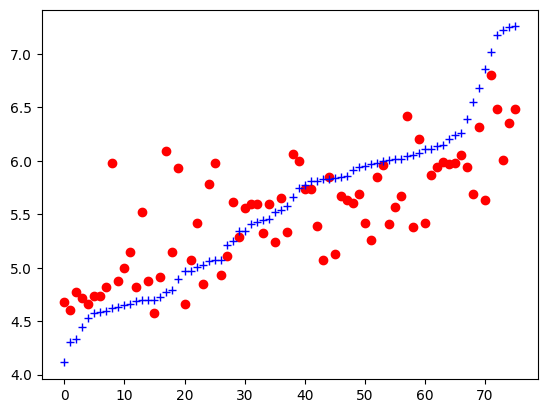

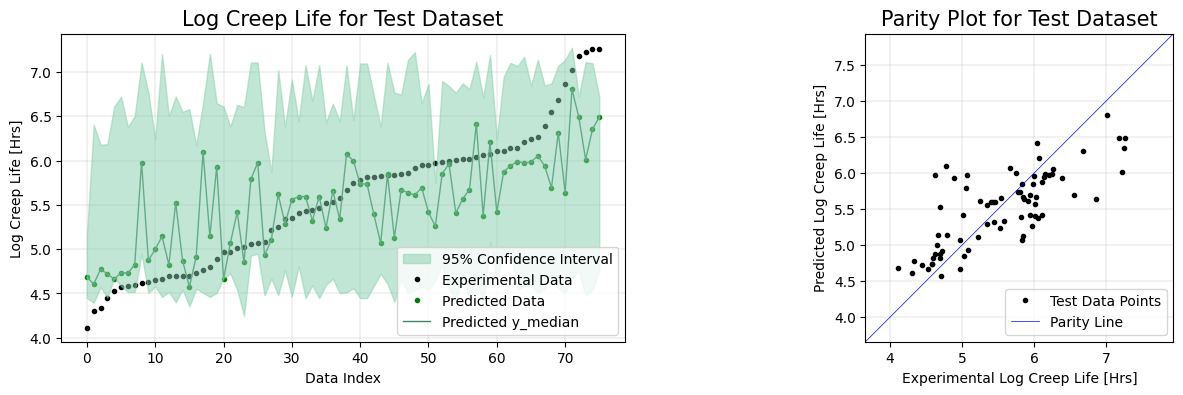

****************************************
q: 0.025 | pearsonr: 0.5100992930312181
q: 0.5 | pearsonr: 0.7861693064368552
q: 0.975 | pearsonr: 0.31079493076490394
Pearson CC: 0.7861693064368552
R2 score: 0.5956020269825356
RMSE: 0.5032976812897259
MAE: 0.3956583099251518
Coverage: 82.89473684210526
Upper coverage: 85.52631578947367
Lower coverage: 97.36842105263158
Average Interval Width: 2.356538317993133
Median Interval Width: 2.3795265042198506
Composite Metric: 0.7267734451597907


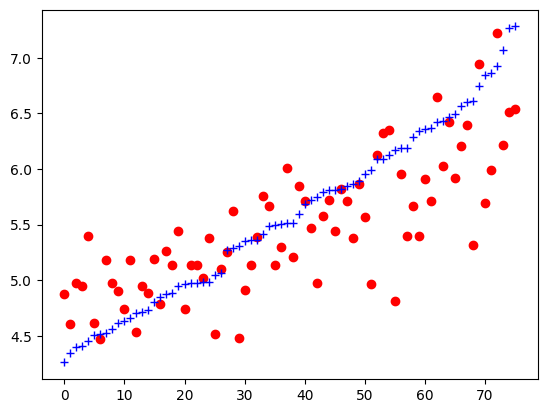

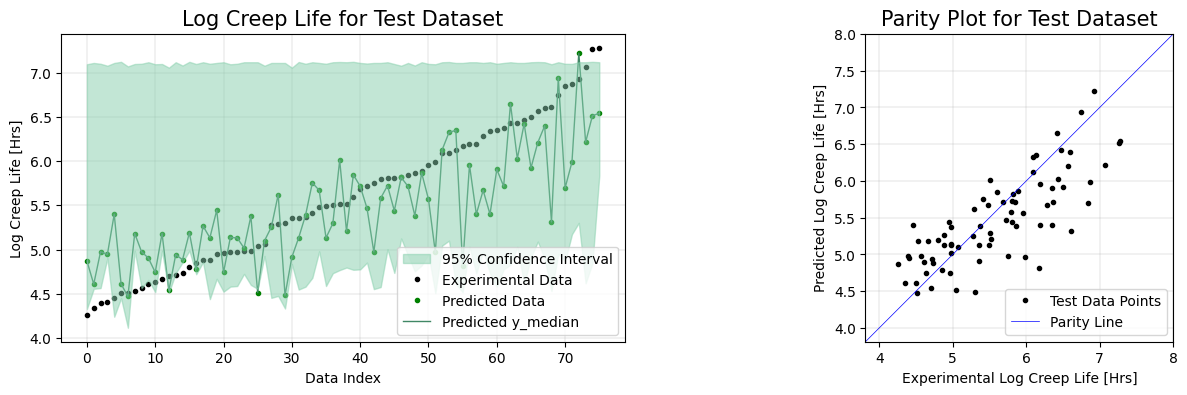

****************************************
q: 0.025 | pearsonr: 0.5550823718790837
q: 0.5 | pearsonr: 0.742935685435096
q: 0.975 | pearsonr: -0.012674924784318527
Pearson CC: 0.742935685435096
R2 score: 0.5219640218417461
RMSE: 0.4800361266249174
MAE: 0.37645775532590725
Coverage: 92.10526315789474
Upper coverage: 96.05263157894736
Lower coverage: 96.05263157894737
Average Interval Width: 2.479081856028109
Median Interval Width: 2.4973614893925724
Composite Metric: 0.7908951256140025


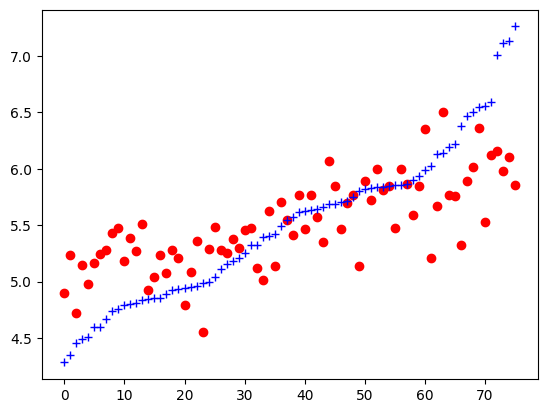

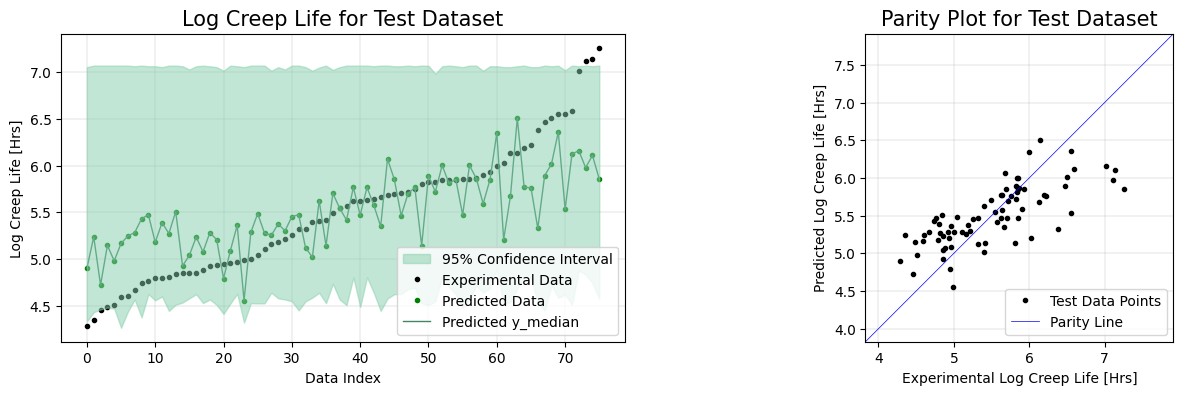

****************************************
q: 0.025 | pearsonr: 0.09844250492891285
q: 0.5 | pearsonr: 0.6513624774076182
q: 0.975 | pearsonr: 0.2873150963696137
Pearson CC: 0.6513624774076182
R2 score: 0.40709002144520423
RMSE: 0.5615695449628979
MAE: 0.40275481026097515
Coverage: 92.0
Upper coverage: 98.66666666666664
Lower coverage: 93.33333333333333
Average Interval Width: 2.290423574263246
Median Interval Width: 2.3771498081096505
Composite Metric: 0.7951679617107531


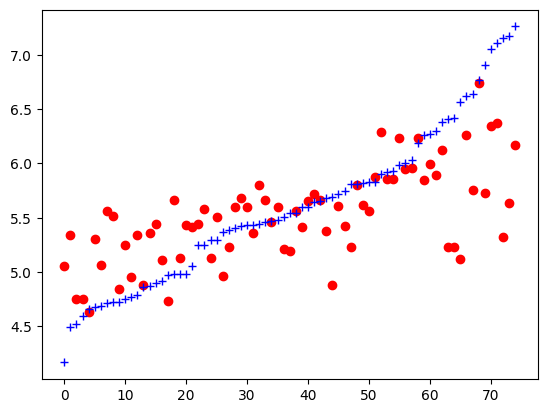

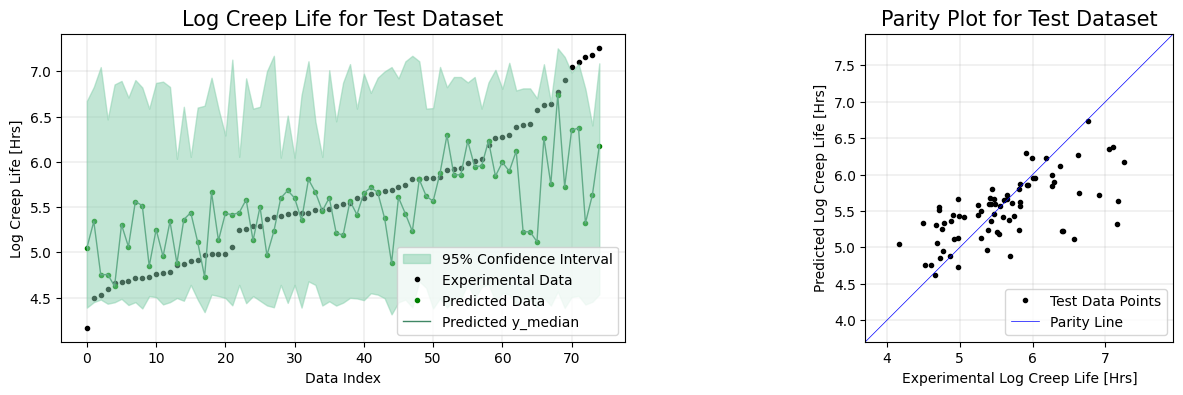

****************************************
q: 0.025 | pearsonr: 0.3462548597702845
q: 0.5 | pearsonr: 0.6868333290825605
q: 0.975 | pearsonr: 0.21506861190765955
Pearson CC: 0.6868333290825605
R2 score: 0.43887940257796754
RMSE: 0.5263705464924135
MAE: 0.4178536093565769
Coverage: 94.66666666666666
Upper coverage: 95.99999999999999
Lower coverage: 98.66666666666666
Average Interval Width: 2.598762921235159
Median Interval Width: 2.6124694171941423
Composite Metric: 0.8056949001410727


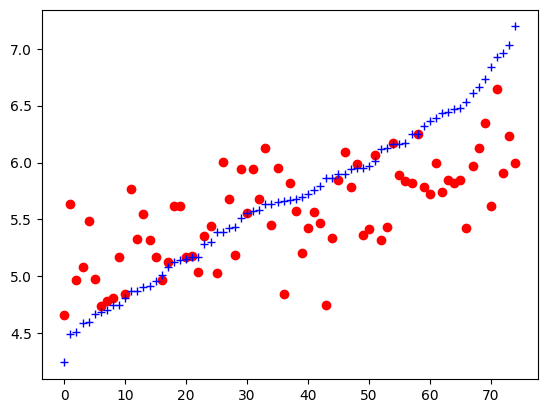

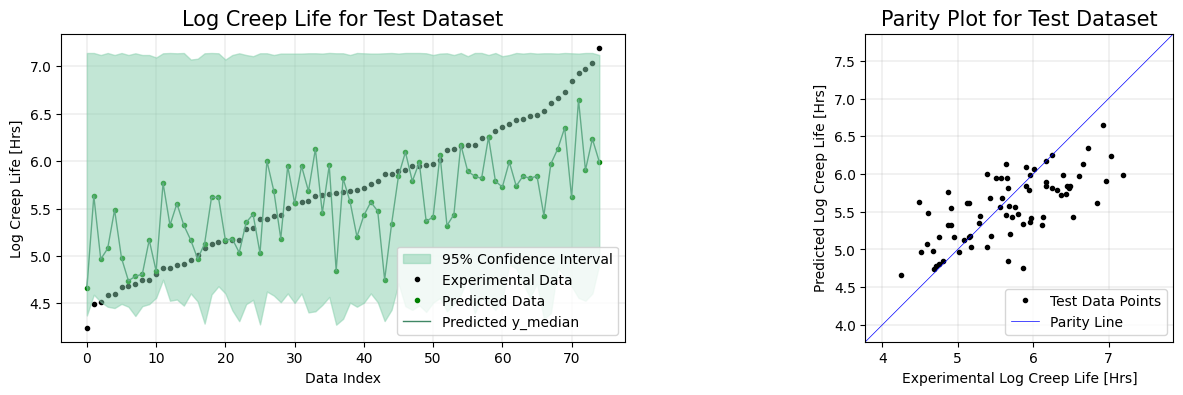

****************************************


In [ ]:
# Evaluate multiple runs of the model
nruns = 1
nfolds = 5

# Metrics for performance evaluation
PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
RMSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)
MAPE = np.zeros_like(PearsonCC)

test_coverage = np.zeros_like(PearsonCC)
upper_coverage = np.zeros_like(PearsonCC)
lower_coverage = np.zeros_like(PearsonCC)
mean_interval_width = np.zeros_like(PearsonCC)
median_interval_width = np.zeros_like(PearsonCC)
composite_metric = np.zeros_like(PearsonCC)

quantiles = [0.025, 0.5, 0.975]

for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=66+j)

        for i, (tr, ts) in enumerate(kf.split(targets)):
                X_train, X_test = features.iloc[tr], features.iloc[ts]
                scale = StandardScaler()
                X_train = scale.fit_transform(X_train)
                X_test = scale.transform(X_test)
                y_train, y_test = targets.iloc[tr], targets.iloc[ts]
                X_train, X_val, y_train, y_val = train_test_split(
                        X_train, y_train, test_size=0.1)

                for q in quantiles:
                        parameters = {'loss_function': 'Quantile:alpha={:0.2f}'.format(q),
                                'num_boost_round': 5000}
                        model = CatBoostRegressor(**parameters)
                        model.fit(X_train, np.log(y_train),
                                eval_set=[(X_val, np.log(y_val))],
                                early_stopping_rounds=20,
                                verbose=False)
                        y_pred = np.exp(model.predict(X_test))
                        print(f'q: {q} | pearsonr: {pearsonr(y_test, y_pred)[0]}')
                        if q==0.025:
                           y_low = y_pred
                        elif q==0.5:
                                y_median = y_pred
                        elif q==0.975:
                               y_high = y_pred

                # Plot the predictions
                iteration_list = [i for i in range(len(y_test))]

                plt.plot(iteration_list, y_median, 'ro')
                plt.plot(iteration_list, y_test, 'b+')

                PearsonCC[j, i] = pearsonr(np.squeeze(y_test), np.squeeze(y_median))[0]
                R2_score[j, i] = r2_score(y_test, y_median)
                RMSE[j, i] = np.sqrt(mean_squared_error(y_test, y_median))
                MAE[j, i] = np.mean(abs(y_median-np.array(y_test)))

                print(f'Pearson CC: {PearsonCC[j, i]}')
                print(f'R2 score: {R2_score[j, i]}')
                print(f'RMSE: {RMSE[j, i]}')
                print(f'MAE: {MAE[j, i]}')

                test_coverage[j, i] = coverage(y_test, y_low, y_high)
                upper_coverage[j, i] = coverage(y_test, y_low, np.inf)
                lower_coverage[j, i] = coverage(y_test, -np.inf, y_high)

                print(f'Coverage: {test_coverage[j, i]}')
                print(f'Upper coverage: {upper_coverage[j, i]}')
                print(f'Lower coverage: {lower_coverage[j, i]}')

                # Prediction interval width
                mean_interval_width[j, i] = np.mean(y_high - y_low)
                print(f'Average Interval Width: {mean_interval_width[j, i]}')
                median_interval_width[j, i] = np.median(y_high - y_low)
                print(f'Median Interval Width: {median_interval_width[j, i]}')

                # Composite metric that combines the coverage and the invers of interval width
                composite_metric[j, i] = 0.75*test_coverage[j, i]/100 + 0.25*(1/median_interval_width[j, i])
                print(f'Composite Metric: {composite_metric[j, i]}')

                # Plot the predictions
                fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

                ## Uncertainty quantification plot
                ax[0].fill_between(iteration_list, y_low, y_high, alpha=0.5, color='#86cfac', zorder=5, label='95% Confidence Interval')
                ax[0].plot(iteration_list, y_test, 'ko', markersize=3, label="Experimental Data")
                ax[0].plot(iteration_list, y_median, 'go', markersize=3, label="Predicted Data")
                ax[0].plot(iteration_list, y_median, '-', linewidth=1, color="#408765", label="Predicted y_median")
                ax[0].legend(loc=4, fontsize=10, frameon=True)
                ax[0].set_xlabel("Data Index", fontsize=10)
                ax[0].set_ylabel("Log Creep Life [Hrs]", fontsize=10)
                ax[0].set_title("Log Creep Life for Test Dataset", fontsize=15)
                ax[0].grid(True, which='major', linestyle='-', linewidth='0.25')

                ## Parity Plot
                # find the boundaries of y_test and y_pred(y_median) values
                bounds = (min(y_test.min(), y_median.min()) - 0.1*y_median.min(), max(y_test.max(), y_median.max())+ 0.1 * y_median.max())
                ax[1].plot(y_test, y_median, 'ko', markersize=3, label="Test Data Points")
                ax[1].legend(loc=4, fontsize=10, frameon=False)
                ax[1].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]],'b-', linewidth=0.5, label="Parity Line") # identity line
                ax[1].legend(loc=4, fontsize=10, frameon=True)
                ax[1].set_xlabel("Experimental Log Creep Life [Hrs]", fontsize=10)
                ax[1].set_ylabel("Predicted Log Creep Life [Hrs]", fontsize=10)
                ax[1].set_title("Parity Plot for Test Dataset", fontsize=15)
                ax[1].grid(True, which='major', linestyle='-', linewidth='0.25')
                ax[1].set_xlim(bounds)
                ax[1].set_ylim(bounds)
                ax[1].set_aspect("equal", adjustable="box") # Square aspect ratio

                plt.show()
                print(40*'*')

In [ ]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'RMSE': RMSE.flatten(),
                    'MAE': MAE.flatten()},index=None)
df1

,Pearson CC,R2 Score,RMSE,MAE
0,0.758859,0.566442,0.506217,0.393623
1,0.786169,0.595602,0.503298,0.395658
2,0.742936,0.521964,0.480036,0.376458
3,0.651362,0.407090,0.561570,0.402755
4,0.686833,0.438879,0.526371,0.417854


In [ ]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
RMSE_mean = np.mean(RMSE)
MAE_mean = np.mean(MAE)
MAPE_mean = np.mean(MAPE)

PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
RMSE_std = np.std(RMSE)
MAE_std = np.std(MAE)
MAPE_std = np.std(MAPE)

# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'RMSE Mean': RMSE_mean, 'RMSE Std': RMSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std,
                   },index=[0])
df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,RMSE Mean,RMSE Std,MAE Mean,MAE Std
0,0.725232,0.049171,0.505995,0.072422,0.515498,0.027325,0.397269,0.013437


In [ ]:
# Data frame
df3 = pd.DataFrame({'Coverage': test_coverage.flatten(), 'Upper Coverage': upper_coverage.flatten(), 'Lower Coverage': lower_coverage.flatten(),
                    'Mean Interval Width': mean_interval_width.flatten(), 'Median Interval Width': median_interval_width.flatten(), 'Composite Metric': composite_metric.flatten()},index=None)
df3

,Coverage,Upper Coverage,Lower Coverage,Mean Interval Width,Median Interval Width,Composite Metric
0,84.210526,90.789474,93.421053,2.145313,2.142964,0.748240
1,82.894737,85.526316,97.368421,2.356538,2.379527,0.726773
2,92.105263,96.052632,96.052632,2.479082,2.497361,0.790895
3,92.000000,98.666667,93.333333,2.290424,2.377150,0.795168
4,94.666667,96.000000,98.666667,2.598763,2.612469,0.805695


In [ ]:
# Calculate mean values and standard deviations of the scores
test_coverage_mean = np.mean(test_coverage)
upper_coverage_mean = np.mean(upper_coverage)
lower_coverage_mean = np.mean(lower_coverage)
mean_interval_width_mean = np.mean(mean_interval_width)
median_interval_width_mean = np.mean(median_interval_width)
composite_metric_mean = np.mean(composite_metric)

test_coverage_std = np.std(test_coverage)
upper_coverage_std = np.std(upper_coverage)
lower_coverage_std = np.std(lower_coverage)
mean_interval_width_std = np.std(mean_interval_width)
median_interval_width_std = np.std(median_interval_width)
composite_metric_std = np.std(composite_metric)

# Data frame
df4 = pd.DataFrame({'Coverage Mean': test_coverage_mean, 'Coverage Std': test_coverage_std, 'Upper Coverage Mean': upper_coverage_mean, 'Upper Coverage Std': upper_coverage_std,
                  'Lower Coverage Mean': lower_coverage_mean, 'Lower Coverage Std': lower_coverage_std,
                    'Mean Interval Width Mean': mean_interval_width_mean, 'Mean Interval Width Std':mean_interval_width_std,
                    'Median Interval Width Mean': median_interval_width_mean, 'Median Interval Width Std':median_interval_width_std,
                   'Composite Metric Mean': composite_metric_mean, 'Composite Metric Std': composite_metric_std,},index=[0])
df4

,Coverage Mean,Coverage Std,Upper Coverage Mean,Upper Coverage Std,Lower Coverage Mean,Lower Coverage Std,Mean Interval Width Mean,Mean Interval Width Std,Median Interval Width Mean,Median Interval Width Std,Composite Metric Mean,Composite Metric Std
0,89.175439,4.707721,93.407018,4.697739,95.768421,2.120396,2.374024,0.155659,2.401894,0.155957,0.773354,0.03043
